In [1]:
using DataFrames, Statistics, Plots, Measures, CSV, Polynomials, Plots

## Zad1 
Uruchomić 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mnożenie BLAS w Julii (`A*B`) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów. Wszystkie trzy metody powinny być na jednym wykresie. **(1pkt)**. Do analizy danych można użyć wybranego narzędzia (Julia, R)

In [2]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    return C
end

naive_multiplication (generic function with 1 method)

In [3]:
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    return C
end

better_multiplication (generic function with 1 method)

In [4]:
# A*B

In [5]:
df = DataFrame(Nodes=Int[],Naive=Float64[],Better=Float64[], Lib = Float64[])
for n in 5:50:505
    A = rand(n, n);
    B = rand(n, n);
    for j in 1:11
        naive_AB, naive_t = @timed naive_multiplication(A,B)
        better_AB, better_t = @timed better_multiplication(A,B)
        lib_AB, lib_t = @timed A*B
        if j > 1
            push!(df,hcat([n],naive_t, better_t, lib_t))
        end
    end
end

In [6]:
df2 = combine(groupby(df, :Nodes), :Naive => mean, :Better => mean, :Lib => mean, :Naive => std, :Better => std, :Lib => std)
println(df2)

11×7 DataFrame
 Row │ Nodes  Naive_mean  Better_mean  Lib_mean    Naive_std    Better_std   Lib_std     
     │ Int64  Float64     Float64      Float64     Float64      Float64      Float64     
─────┼───────────────────────────────────────────────────────────────────────────────────
   1 │     5  7.5e-7       2.6e-7      1.07e-6     1.06693e-6   1.3499e-7    1.78391e-6
   2 │    55  0.00036484   0.00011031  1.774e-5    1.00629e-5   3.30873e-6   3.20562e-6
   3 │   105  0.00356198   0.00083997  0.00042908  0.000688213  0.000132282  0.000143566
   4 │   155  0.010191     0.00281508  0.00052339  0.000783875  0.000565054  0.000154258
   5 │   205  0.0235189    0.00574964  0.00083248  0.00164997   0.000379522  0.000373394
   6 │   255  0.0451881    0.0117155   0.00361403  0.00170116   0.000646141  0.00861051
   7 │   305  0.0768161    0.0198442   0.00140105  0.00178679   0.00134736   0.000539708
   8 │   355  0.123223     0.0308181   0.00192793  0.0036133    0.00168312   0.000424138
   9 │

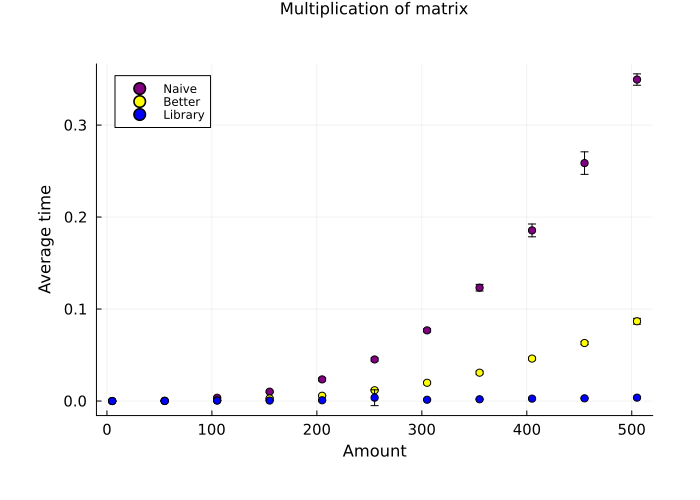

In [7]:
scatter(
    df2.Nodes, 
    size = (700, 500), 
    margin=10mm,
    xtickfontsize=10, 
    ytickfontsize=10, 
    titlefontsize = 11,
    xlabel = "Amount",
    ylabel = "Average time",
    [df2.Naive_mean, df2.Better_mean, df2.Lib_mean], 
    title = "Multiplication of matrix", 
    label = ["Naive"  "Better" "Library"],
    color = [:purple :yellow :blue],
    yerr = [df2.Naive_std df2.Better_std df2.Lib_std], 
    legend = true
)

## ZAD 2
Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną wersję za pomocą zamiany pętli metodę mnożenia macierzy(wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1. (osobno niż p.1). **(1 pkt)**
    
    *(Dla chętnych)* sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. 
Do analizy danych można użyć wybranego narzędzia (Julia, R)

In [8]:
mydata=CSV.read("C_results.csv", DataFrame)
c_data = combine(groupby(mydata,:1),:2 => mean => :m1,:2=> std => :s1, :3 => mean => :m2, :3 => std => :s2, :4 => mean => :m3, :4 => std => :s3)
print(c_data)

11×7 DataFrame
 Row │ size   m1         s1           m2         s2           m3         s3          
     │ Int64  Float64    Float64      Float64    Float64      Float64    Float64     
─────┼───────────────────────────────────────────────────────────────────────────────
   1 │     5  0.0        0.0          0.0        0.0          3.0e-7     9.48683e-7
   2 │    55  0.0001152  9.11409e-6   0.0001233  1.92991e-5   1.24e-5    5.3375e-6
   3 │   105  0.0908154  0.284681     0.0008059  6.20259e-5   8.02e-5    7.61285e-6
   4 │   155  0.0027411  0.000279333  0.0026267  0.000170229  0.0002648  4.3563e-5
   5 │   205  0.0062003  0.000273784  0.0961367  0.284811     0.0005864  8.91867e-5
   6 │   255  0.102765   0.284547     0.191627   0.37971      0.0010457  3.54872e-5
   7 │   305  0.200548   0.380872     0.19948    0.379888     0.0019373  0.000478922
   8 │   355  0.199285   0.380833     0.198566   0.379489     0.0017323  0.00012032
   9 │   405  0.208538   0.379528     0.297486   0.43460

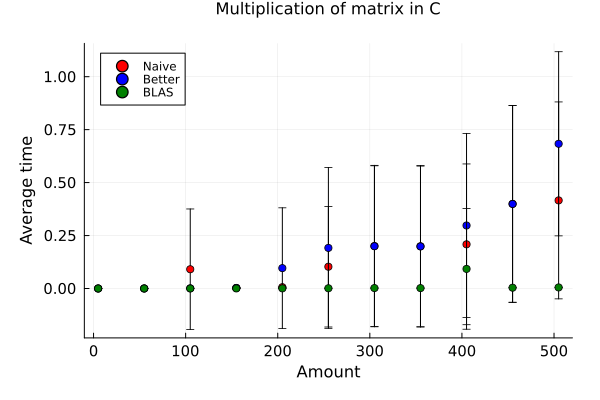

In [9]:
scatter(
    c_data.size, 
    margin=5mm,xtickfontsize=10, 
    ytickfontsize=10, 
    titlefontsize = 11,
    xlabel = "Amount",
    ylabel = "Average time",
    [c_data.m1,c_data.m2,c_data.m3], 
    title = "Multiplication of matrix in C", 
    legend_position = :topleft, 
    label = ["Naive" "Better" "BLAS"], 
    color = [:red :blue :green],
    yerr = [c_data.s1 c_data.s2 c_data.s3]
)

## ZAD 3
Użyć aproksymacji odpowiednimi wielomianami, które najlepiej pasują do zależności czasowych każdego z algorytmów. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianów do wcześniejszych wykresów. **(1 pkt)** Do analizy danych można użyć wybranego narzędzia (Julia, R)

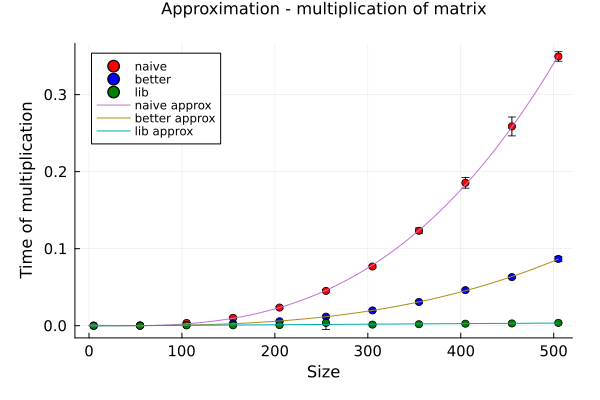

In [10]:
fit1 = fit(df2.Nodes, df2.Naive_mean, 3)
fit2 = fit(df2.Nodes, df2.Better_mean, 3)
fit3 = fit(df2.Nodes, df2.Lib_mean, 2)
xs = 0:1:505
scatter(
    df2.Nodes,  
    margin=5mm,
    xtickfontsize=10, 
    ytickfontsize=10, 
    titlefontsize = 11,
    xlabel = "Size",
    ylabel = "Time of multiplication",
    [df2.Naive_mean,df2.Better_mean,df2.Lib_mean], 
    title = "Approximation - multiplication of matrix", 
    legend_position = :topleft, 
    label = ["naive" "better" "lib"], 
    color = [:red :blue :green],
    yerr = [df2.Naive_std df2.Better_std df2.Lib_std]
)
plot!(fit1,extrema(xs)...,label="naive approx")
plot!(fit2,extrema(xs)...,label="better approx")
plot!(fit3,extrema(xs)...,label="lib approx")

W dwóch pierwszych algrytmach wykorzystano aproksymację sześcienną, w przypadku bibliotecznego kwadratową.

## ZAD 4
Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres

In [11]:
function to_approx(x)
    1/(1+x^2)
end

to_approx (generic function with 1 method)

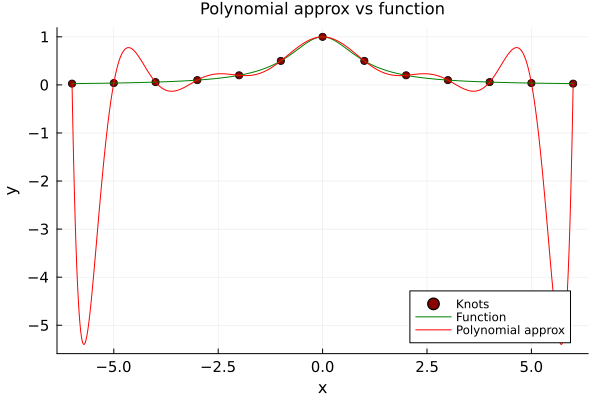

In [12]:
xs = -6:1:6
ys = [to_approx(x) for x in xs]
poly_approx = fit(xs,ys,12)
distrib = -6:0.01:6
y_distrib = [poly_approx(x) for x in distrib]
scatter(
    xs,
    ys,
    xtickfontsize=10, 
    ytickfontsize=10, 
    titlefontsize = 11,
    label="Knots",
    color = :darkred,
    title = "Polynomial approx vs function",
    xlabel = "x",
    ylabel = "y"
)
plot!(
    to_approx,
    extrema(xs)...,
    label="Function",
    color = :green
)
plot!(
    distrib,
    y_distrib,
    label="Polynomial approx",
    color = :red
)

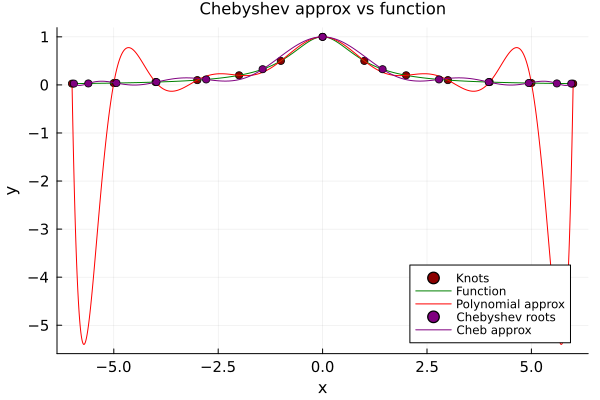

In [13]:
base = [0 for _ in 1:13]
!push(base, 1)
cheb = ChebyshevT(base)
rootz = Polynomials.roots(cheb)
rootz = 6*rootz # scale it
ys2 =[to_approx(x) for x in rootz]
cheb_approx = fit(rootz, ys2, 13)
scatter!(
    rootz, 
    ys2, 
    label = "Chebyshev roots",
    color = :purple, 
    title="Chebyshev approx vs function",
)
y_cheb_distrib = [cheb_approx(x) for x in distrib]
plot!(
    distrib,
    y_cheb_distrib, 
    label = "Cheb approx",
    color = :purple
)

## ZAD 5
Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ **(1 pkt)**